In [3]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/Assignment2/data.csv

--2022-04-15 05:54:36--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/Assignment2/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117184 (114K) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>] 114.44K  --.-KB/s    in 0.02s   

2022-04-15 05:54:37 (4.50 MB/s) - ‘data.csv.1’ saved [117184/117184]



In [4]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot the given data points on the console in order to visualize it.

In [5]:
data=pd.read_csv("data.csv",header=None)

In [6]:
data[0]

0      -0.593257
1      -0.050397
2       1.685130
3       0.331759
4       1.918354
          ...   
2995    0.367553
2996    1.774294
2997    0.666761
2998   -1.255312
2999    0.180363
Name: 0, Length: 3000, dtype: float64

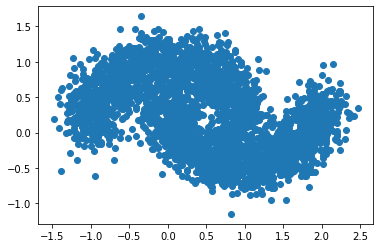

In [7]:
plt.scatter(data[0],data[1])

In [8]:
data=np.array(data)

In [9]:
data

array([[-0.59325729,  0.32603907],
       [-0.05039701,  1.09512673],
       [ 1.6851297 , -0.07421167],
       ...,
       [ 0.66676143, -0.32587752],
       [-1.25531237,  0.35863227],
       [ 0.18036305,  0.35811943]])

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
data_ss=StandardScaler().fit_transform(data)
data_mm=MinMaxScaler().fit_transform(data)

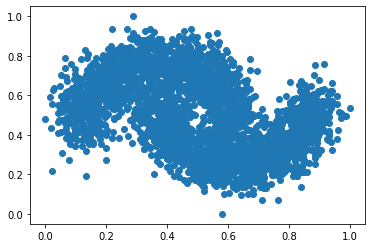

In [11]:
plt.scatter(data_mm[:,0],data_mm[:,1])

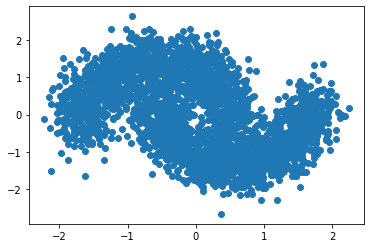

In [12]:
plt.scatter(data_ss[:,0],data_ss[:,1])

# Feature preprocessing , Feature extraction and clustering of data , with inertia used as parameter for selecting best clusters

In [14]:
def inertia(datapoints,labels):
  cluster_centers=[]
  for i in range(2):
    cluster_centers.append(np.mean(datapoints[labels==i]))
  iner=0.0
  for i in range(len(datapoints)):
    iner+=(datapoints[i]-cluster_centers[labels[i]])**2
  return np.sqrt(np.sum(iner))

In [15]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import mean_shift

In [ ]:
clf_parameters = {
        "clf__algorithm": ('auto', 'full', 'elkan'),
        "clf__init":('k-means++', 'random'),
        }

In [16]:
clf=KMeans(n_clusters=2, random_state=0,n_init=300,init="k-means++",algorithm="full")
clf.fit(data)
labels=clf.labels_

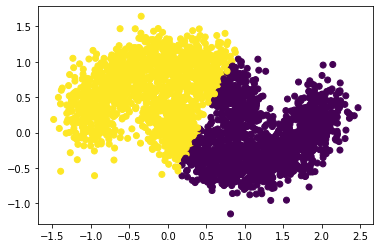

In [17]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

In [18]:
inertia(data,labels)

55.235491323403515

In [22]:
clf=KMeans(n_clusters=2, random_state=0,n_init=3000,init="random",algorithm="full")
clf.fit(data)
labels=clf.labels_

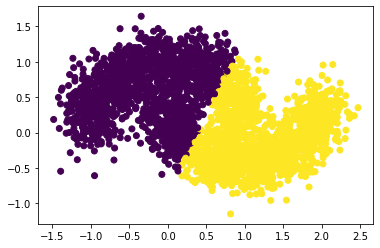

In [23]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

In [24]:
inertia(data,labels)

55.235491323403515

In [25]:
labels

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [28]:
"""
clf_parameters = {
        "clf__affinity": ('euclidean, “l1”, “l2”, “manhattan”, “cosine”),
        "clf__linkage":('ward', 'complete', 'average', 'single')
        }
"""

'\nclf_parameters = {\n        "clf__affinity": (\'euclidean, “l1”, “l2”, “manhattan”, “cosine”),\n        "clf__linkage":(\'ward\', \'complete\', \'average\', \'single\')\n        }\n'

In [29]:
AC=AgglomerativeClustering(n_clusters=2,affinity="euclidean").fit(data)
ac_labels=AC.labels_

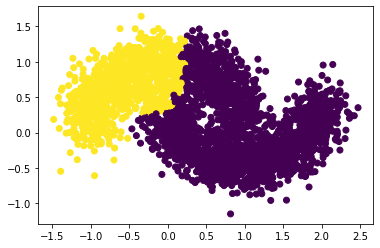

In [30]:
plt.scatter(data[:,0],data[:,1],c=ac_labels)
plt.show()

In [31]:
inertia(data,ac_labels)

55.0374234165775

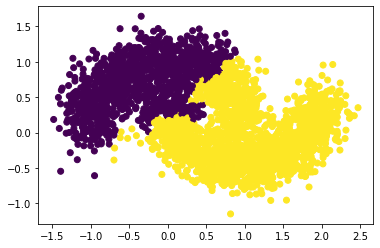

56.04506171643834


In [32]:
AC=AgglomerativeClustering(n_clusters=2,affinity="l1",linkage="average").fit(data)
ac_labels=AC.labels_
plt.scatter(data[:,0],data[:,1],c=ac_labels)
plt.show()
print(inertia(data,ac_labels))

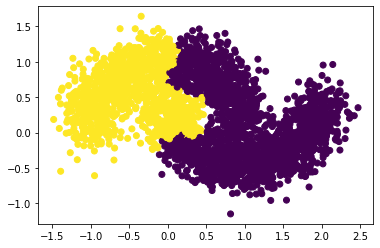

54.09129353349867


In [50]:
AC=AgglomerativeClustering(n_clusters=2,affinity="l2",linkage="average").fit(data) # BEST MODEL , WILL BE SELECTED FOR OUTPUT , LEAST INERTIA SCORE
ac_labels=AC.labels_
plt.scatter(data[:,0],data[:,1],c=ac_labels)
plt.show()
print(inertia(data,ac_labels))

In [51]:
ac_labels

array([1, 1, 0, ..., 0, 1, 1])

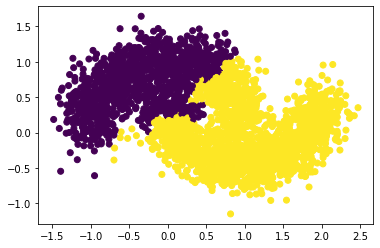

56.04506171643834


In [35]:
AC=AgglomerativeClustering(n_clusters=2,affinity="manhattan",linkage="average").fit(data)
ac_labels=AC.labels_
plt.scatter(data[:,0],data[:,1],c=ac_labels)
plt.show()
print(inertia(data,ac_labels))

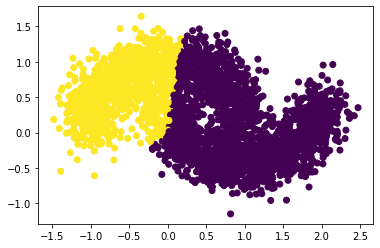

54.51464780207903


In [36]:
AC=AgglomerativeClustering(n_clusters=2,affinity="cosine",linkage="average").fit(data)
ac_labels=AC.labels_
plt.scatter(data[:,0],data[:,1],c=ac_labels)
plt.show()
print(inertia(data,ac_labels))

In [37]:
len(data)

3000

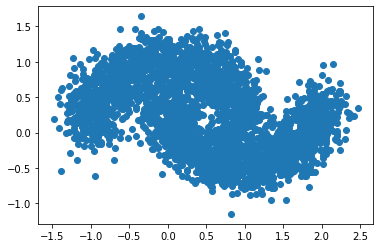

In [38]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.00000001, min_samples=10)

yhat = model.fit_predict(data)
clusters = np.unique(yhat)
for cluster in clusters:
	row_ix = np.where(yhat == cluster)
	plt.scatter(data[row_ix, 0], data[row_ix, 1])
plt.show()

In [39]:
yhat+1

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
inertia(data,yhat+1)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


57.318298698963076

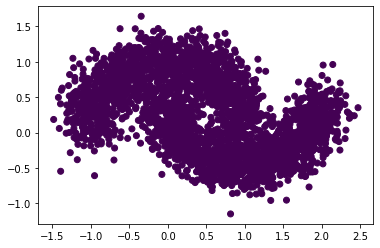

57.318298698963076


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
clf=mean_shift(data)
clf_labels=clf[1]
plt.scatter(data[:,0],data[:,1],c=clf_labels)
plt.show()
print(inertia(data,clf_labels))

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
poly_fit=poly.fit(data)
x_data=poly_fit.transform(data)

In [43]:
clf=KMeans(n_clusters=2, random_state=0,n_init=300,init="k-means++",algorithm="full")
clf.fit(x_data)
labels=clf.labels_

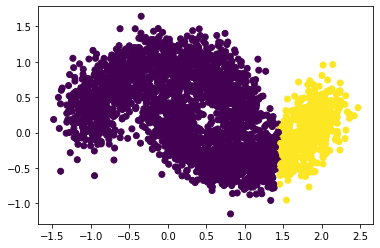

In [44]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

In [45]:
inertia(data,ac_labels)

54.51464780207903

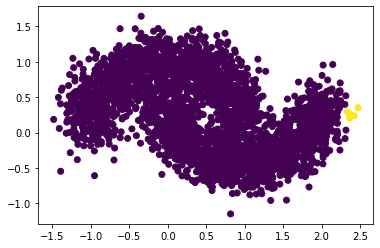

57.20662004787046


In [46]:
AC=AgglomerativeClustering(n_clusters=2,affinity="l2",linkage="average").fit(x_data)
ac_labels=AC.labels_
plt.scatter(data[:,0],data[:,1],c=ac_labels)
plt.show()
print(inertia(data,ac_labels))

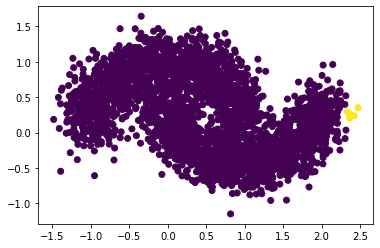

57.20662004787046


In [47]:
AC=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="average").fit(x_data)
ac_labels=AC.labels_
plt.scatter(data[:,0],data[:,1],c=ac_labels)
plt.show()
print(inertia(data,ac_labels))

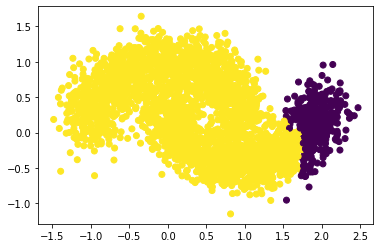

54.250962553542216


In [48]:
AC=AgglomerativeClustering(n_clusters=2,affinity="manhattan",linkage="average").fit(x_data)
ac_labels=AC.labels_
plt.scatter(data[:,0],data[:,1],c=ac_labels)
plt.show()
print(inertia(data,ac_labels))

# Saving model class predictions into text file , best model selected based on least inertia score

In [55]:
file=open("test_outputs.txt","w+")
for i in ac_labels:
  file.write(str(i)+"\n")

In [56]:
test_data=open("test_outputs.txt","r")

In [57]:
test_data.readlines()

['1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
